In [1]:
import pandas as pd
import numpy as np
import json
import pickle
import warnings 
warnings.filterwarnings("ignore")
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

### Step-1(problem statement)

## Step-2 (Data gathering)

In [2]:
df_busi = pd.read_csv("business.csv")

In [3]:
df_busi["class"]  = "Business"

In [4]:
df_busi

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",Business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",Business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",Business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",Business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",Business
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",Business
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",Business
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",Business
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",Business


In [5]:
df_ec = pd.read_csv("economy.csv")

In [6]:
df_ec["class"] = "Economy"

In [7]:
df_ec

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy
...,...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",Economy
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",Economy
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",Economy
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",Economy


In [8]:
df_busi

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",Business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",Business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",Business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",Business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",Business
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",Business
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",Business
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",Business
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",Business


In [9]:
df = df_ec.append(df_busi,ignore_index= True)

In [10]:
df.shape

(300261, 12)

In [11]:
df1 = df.copy() # data frame backup

In [12]:
df1.sample(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
237524,24-03-2022,Vistara,UK,950,21:55,Mumbai,20h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:05,Kolkata,"62,045",Business
118169,14-03-2022,Vistara,UK,850,19:55,Bangalore,24h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,Chennai,"4,672",Economy
153132,17-02-2022,Air India,AI,698,22:15,Hyderabad,10h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:10,Delhi,"15,058",Economy
39889,13-03-2022,Air India,AI,560,08:10,Delhi,23h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:00,Chennai,"3,306",Economy
100591,20-03-2022,GO FIRST,G8,7548,19:00,Bangalore,01h 40m,non-stop,20:40,Mumbai,"2,201",Economy


### we have to do initial preprocessing beacuse we can see there is lot of things we have to do in data

In [13]:
df1_date2 = pd.DataFrame(df1["date"].str.split("-",expand = True).to_numpy().astype(int),columns = ["Day","Month","Year"])

In [14]:
df1_date2

,Day,Month,Year
0,11,2,2022
1,11,2,2022
2,11,2,2022
3,11,2,2022
4,11,2,2022
...,...,...,...
300256,31,3,2022
300257,31,3,2022
300258,31,3,2022
300259,31,3,2022


In [15]:
np.min(df1_date2["Day"][(np.where(df1_date2["Month"] == 2))[0]])


11

In [16]:
df1_date3 = np.where(df1_date2["Month"] > 2,df1_date2["Day"]+18,np.where(df1_date2["Month"] == 2,df1_date2["Day"]-10,df1_date2["Day"]))

In [17]:
df1_date3

array([ 1,  1,  1, ..., 49, 49, 49])

In [18]:
df1["days_left"] = df1_date3

In [19]:
df1.sample(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left
225039,31-03-2022,Air India,AI,865,10:40,Delhi,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,07:15,Chennai,"45,257",Business,49
724,15-02-2022,Air India,AI,9915,18:35,Delhi,21h 15m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,15:50,Mumbai,"14,985",Economy,5
120152,15-02-2022,Vistara,UK,774,20:35,Kolkata,17h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,14:05,Delhi,"13,524",Economy,5
24407,07-03-2022,Air India,AI,889,09:25,Delhi,28h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n...,13:30,Kolkata,"6,542",Economy,25
116456,22-02-2022,Vistara,UK,897,07:55,Bangalore,08h 25m,2+-stop,16:20,Chennai,"15,090",Economy,12


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
 12  days_left   300261 non-null  int32 
dtypes: int32(1), int64(1), object(11)
memory usage: 28.6+ MB


In [21]:
df1["flight_code"] =  df1["num_code"].astype(str) + "-" +  df1["ch_code"] 

In [22]:
df1.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left,flight_code
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy,1,8709-SG
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy,1,8157-SG
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy,1,764-I5
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy,1,995-UK
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy,1,963-UK


In [23]:
df1 = df1.drop(["ch_code","num_code","date"], axis = 1)

In [24]:
df1.head()

,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left,flight_code
0,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy,1,8709-SG
1,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy,1,8157-SG
2,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy,1,764-I5
3,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy,1,995-UK
4,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy,1,963-UK


In [25]:
df1["dep_time"].dtype

dtype('O')

In [26]:
s = pd.DataFrame(df1["dep_time"].str.split(":",expand = True).to_numpy().astype(int),columns = ["h","m"])

df1["dep_time"]  = pd.cut(x= s["h"] ,bins = 6 , labels = ["late night","early morning","morning","afternoon","evening","night"])

In [27]:
df1.head()

,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left,flight_code
0,SpiceJet,evening,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy,1,8709-SG
1,SpiceJet,early morning,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy,1,8157-SG
2,AirAsia,early morning,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy,1,764-I5
3,Vistara,morning,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy,1,995-UK
4,Vistara,morning,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy,1,963-UK


In [28]:
s = pd.DataFrame(df1["arr_time"].str.split(":",expand = True).to_numpy().astype(int),columns = ["h","m"])

df1["arr_time"]  = pd.cut(x= s["h"] ,bins = 6 , labels = ["late night","early morning","morning","afternoon","evening","night"])

In [29]:
df1.head()

,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left,flight_code
0,SpiceJet,evening,Delhi,02h 10m,non-stop,night,Mumbai,"5,953",Economy,1,8709-SG
1,SpiceJet,early morning,Delhi,02h 20m,non-stop,morning,Mumbai,"5,953",Economy,1,8157-SG
2,AirAsia,early morning,Delhi,02h 10m,non-stop,early morning,Mumbai,"5,956",Economy,1,764-I5
3,Vistara,morning,Delhi,02h 15m,non-stop,afternoon,Mumbai,"5,955",Economy,1,995-UK
4,Vistara,morning,Delhi,02h 20m,non-stop,morning,Mumbai,"5,955",Economy,1,963-UK


In [30]:
b = pd.DataFrame(df1["time_taken"].str.split(" ",expand = True).to_numpy(),columns = ["h","m"])
b["h"]  = b["h"].apply(lambda x : re.sub("[^0-9]","",x)).astype(int)
b["m"]  = b["m"].apply(lambda y : re.sub("[^0-9]","",y))
b["m"]  = np.where(b["m"] == "", 0, b["m"])
b["m"] = b["m"].astype(int)
df1["time_taken"] = np.around(b["h"] + b["m"]/60,2)
df1.head(2)

,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left,flight_code
0,SpiceJet,evening,Delhi,2.17,non-stop,night,Mumbai,"5,953",Economy,1,8709-SG
1,SpiceJet,early morning,Delhi,2.33,non-stop,morning,Mumbai,"5,953",Economy,1,8157-SG


In [31]:
df1["stop"].value_counts()

1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      243603
non-stop                                                                         36044
2+-stop                                                                          13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t

In [32]:
d1  =  pd.DataFrame(df1["stop"].str.split("-",expand = True).to_numpy(),columns = ["stop","none"])
d2  = np.where(d1["stop"] == "non", 0,d1["stop"])
df1["stop"]   = df1["stop"].apply( lambda x : re.sub("[^0-9]","",x))
df1["stop"] = np.where(df1["stop"] == "",0,df1["stop"]).astype(int)

In [33]:
df1["stop"].value_counts()

1    250929
0     36044
2     13288
Name: stop, dtype: int64

In [34]:
df1["price"]  = df1["price"].apply( lambda x : re.sub("[^0-9]","", x)).astype(int)

In [35]:
df2 = df1.copy() # make backupe of data

## Step-3(EDA OR Data validation)

In [36]:
df2.shape

(300261, 11)

In [37]:
df2.sample(5) # check 5 sample rows from the data

,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left,flight_code
72661,Vistara,afternoon,Mumbai,7.67,2,evening,Hyderabad,6873,Economy,18,613-UK
4922,Air India,evening,Delhi,2.00,0,night,Mumbai,2476,Economy,26,868-AI
195587,Vistara,early morning,Chennai,10.83,2,evening,Bangalore,6089,Economy,23,832-UK
226015,Vistara,afternoon,Mumbai,4.50,1,evening,Delhi,37405,Business,11,613-UK
35616,Indigo,night,Delhi,2.83,0,late night,Chennai,7425,Economy,4,2061-6E


In [38]:
df2.info() #  information about data type and non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   airline      300261 non-null  object  
 1   dep_time     300261 non-null  category
 2   from         300261 non-null  object  
 3   time_taken   300261 non-null  float64 
 4   stop         300261 non-null  int32   
 5   arr_time     300261 non-null  category
 6   to           300261 non-null  object  
 7   price        300261 non-null  int32   
 8   class        300261 non-null  object  
 9   days_left    300261 non-null  int32   
 10  flight_code  300261 non-null  object  
dtypes: category(2), float64(1), int32(3), object(5)
memory usage: 17.8+ MB


In [39]:
df2.describe() # stats for the numerical columns

,time_taken,stop,price,days_left
count,300261.000000,300261.000000,300261.000000,300261.000000
mean,12.219142,0.924213,20883.717666,26.004473
std,7.200348,0.398188,22695.911266,13.560985
min,0.830000,0.000000,1105.000000,1.000000
25%,6.750000,1.000000,4783.000000,15.000000
50%,11.250000,1.000000,7425.000000,26.000000
75%,16.170000,1.000000,42521.000000,38.000000
max,103.000000,2.000000,123071.000000,49.000000


In [40]:
df2.duplicated().sum()  # check duplicated rows from tthe data

2

In [41]:
df2[df2["price"] == 123071.000000]

,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left,flight_code
261485,Vistara,morning,Kolkata,13.5,1,night,Delhi,123071,Business,3,772-UK


In [42]:
df2.isnull().sum() # check for null values

airline        0
dep_time       0
from           0
time_taken     0
stop           0
arr_time       0
to             0
price          0
class          0
days_left      0
flight_code    0
dtype: int64

In [43]:
df2.columns

Index(['airline', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to',
       'price', 'class', 'days_left', 'flight_code'],
      dtype='object')

### univariate analysis

In [44]:
df2["airline"].value_counts()

Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64

In [45]:
df2["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir'], dtype=object)

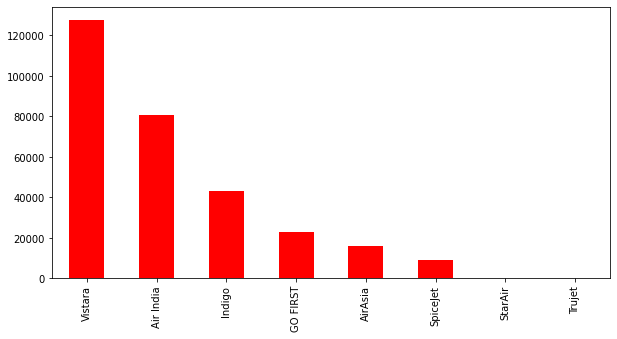

In [46]:
plt.figure(figsize = (10,5))  # make bar graph for categrories
df2["airline"].value_counts().plot(kind = "bar",cmap = "flag")
plt.show()

In [47]:
df2["dep_time"].value_counts()

morning          75250
evening          65417
early morning    62042
night            49504
afternoon        46858
late night        1190
Name: dep_time, dtype: int64

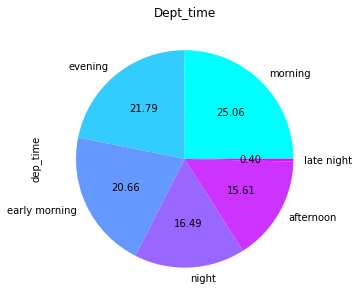

In [48]:
plt.figure(figsize = (15,5))
df2["dep_time"].value_counts().plot(kind = "pie",autopct = "%.2f",cmap = 'cool')
plt.title("Dept_time")
plt.show()

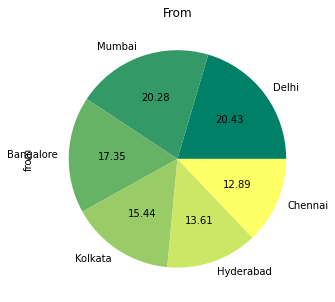

In [49]:
plt.figure(figsize = (15,5))
df2["from"].value_counts().plot(kind = "pie",autopct = "%.2f",cmap = 'summer')
plt.title("From")
plt.show()

In [50]:
df2.columns

Index(['airline', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to',
       'price', 'class', 'days_left', 'flight_code'],
      dtype='object')

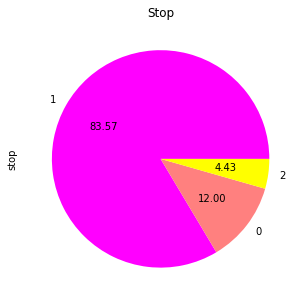

In [51]:
plt.figure(figsize = (15,5))
df2["stop"].value_counts().plot(kind = "pie",autopct = "%.2f",cmap = 'spring')
plt.title("Stop")
plt.show()

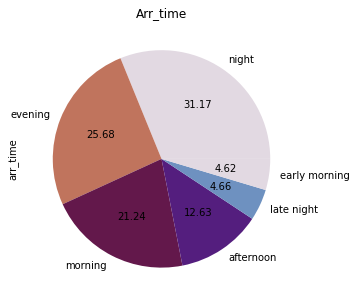

In [52]:
plt.figure(figsize = (15,5))
df2["arr_time"].value_counts().plot(kind = "pie",autopct = "%.2f",cmap = 'twilight_r')
plt.title("Arr_time")
plt.show()

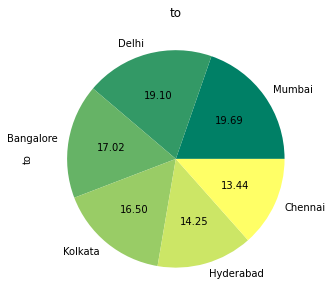

In [53]:
plt.figure(figsize = (15,5))
df2["to"].value_counts().plot(kind = "pie",autopct = "%.2f",cmap = 'summer')
plt.title("to")
plt.show()

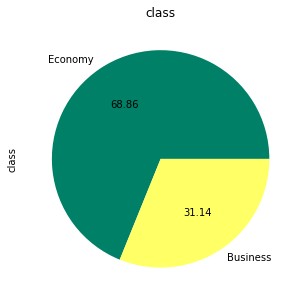

In [54]:
plt.figure(figsize = (15,5))
df2["class"].value_counts().plot(kind = "pie",autopct = "%.2f",cmap = 'summer')
plt.title("class")
plt.show()

In [55]:
df2.columns

Index(['airline', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to',
       'price', 'class', 'days_left', 'flight_code'],
      dtype='object')

<AxesSubplot:xlabel='time_taken', ylabel='Density'>

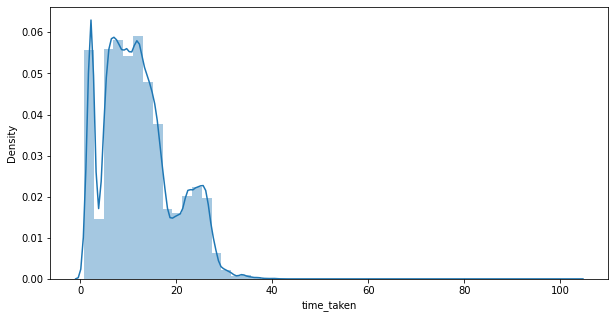

In [56]:
plt.figure(figsize = (10,5))  # distribution of data numerical column
sns.distplot(df2["time_taken"])

<AxesSubplot:xlabel='days_left', ylabel='Density'>

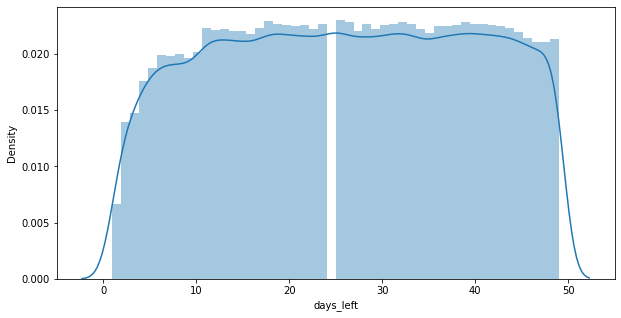

In [57]:
plt.figure(figsize = (10,5))  # distribution of data for numerical column
sns.distplot(df2["days_left"])

### Bivariate anylysis

### a) Does price vary with Airlines?


<AxesSubplot:xlabel='airline', ylabel='price'>

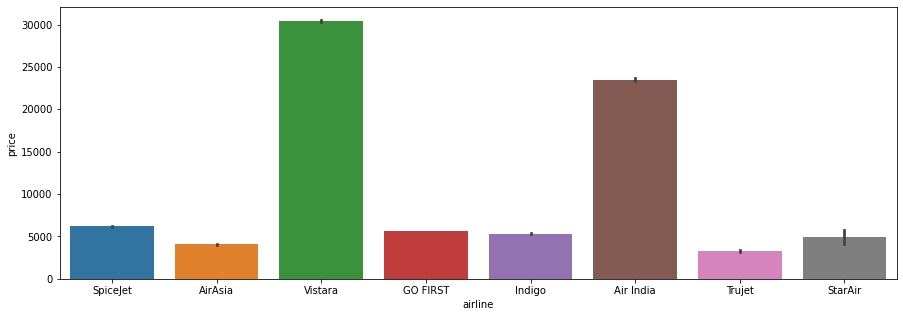

In [58]:
plt.figure(figsize = (15,5))
sns.barplot(data = df2, x = "airline" , y = "price")

### b) How is the price affected when tickets are bought in just 1 or 2 days before departure?


<AxesSubplot:xlabel='days_left', ylabel='price'>

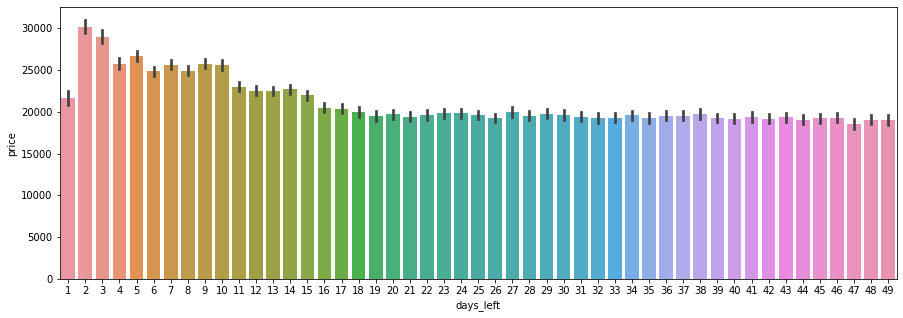

In [59]:
plt.figure(figsize = (15,5))
sns.barplot(x= "days_left",y = "price",data = df2)

### c) Does ticket price change based on the departure time and arrival time?

<AxesSubplot:xlabel='arr_time', ylabel='price'>

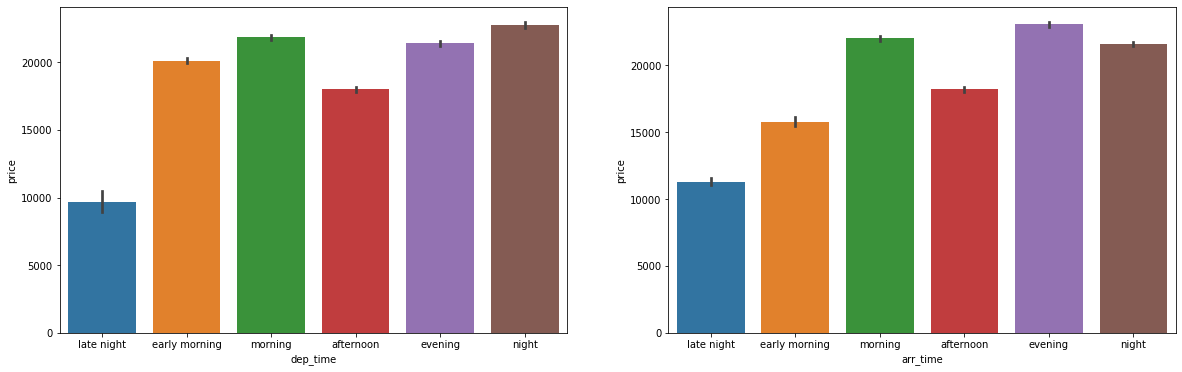

In [60]:
fig,ax=plt.subplots(1,2,figsize=(20,6))

sns.barplot(x='dep_time',y='price',data=df2,ax=ax[0])
sns.barplot(x='arr_time',y='price',data=df2,ax=ax[1])

### d) How the price changes with change in Source and Destination?


<AxesSubplot:xlabel='to', ylabel='price'>

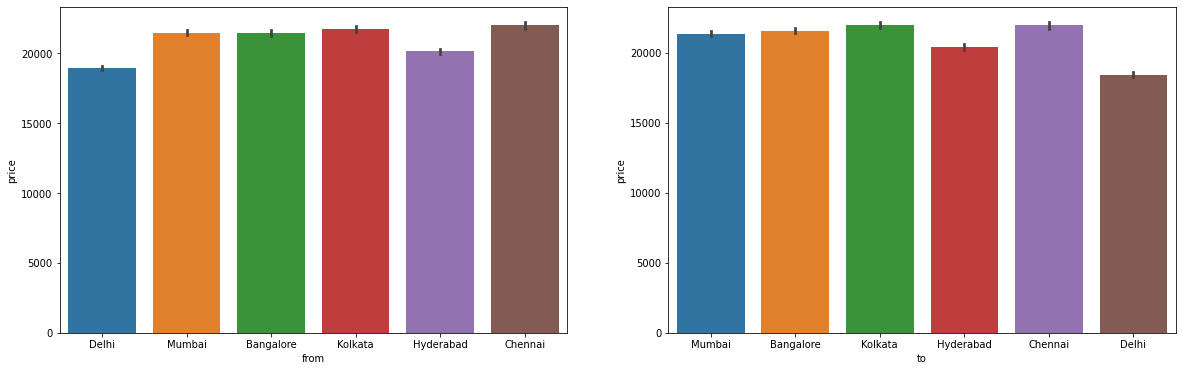

In [61]:
fig,ax=plt.subplots(1,2,figsize=(20,6))

sns.barplot(x='from',y='price',data=df2,ax=ax[0])
sns.barplot(x='to',y='price',data=df2,ax=ax[1])

<AxesSubplot:xlabel='from', ylabel='price'>

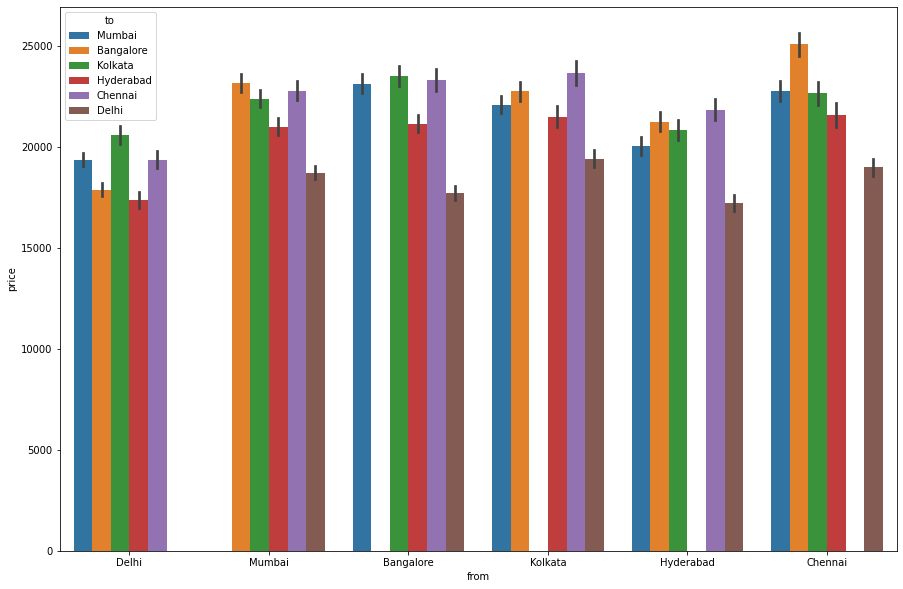

In [62]:
plt.figure(figsize = (15,10))
sns.barplot(data = df2, x = "from" , y = "price" , hue = "to")

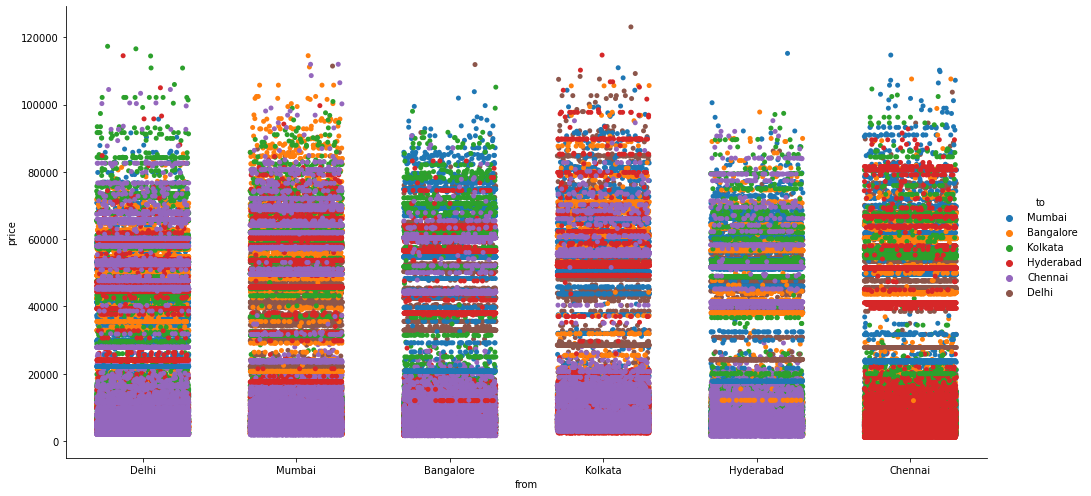

In [63]:
sns.catplot(data = df2, x = "from" , y = "price", kind = "strip" , hue = "to",aspect = 2,height = 7,jitter = 0.3)
plt.show()

### e) How does the ticket price vary between Economy and Business class?

<AxesSubplot:xlabel='class', ylabel='price'>

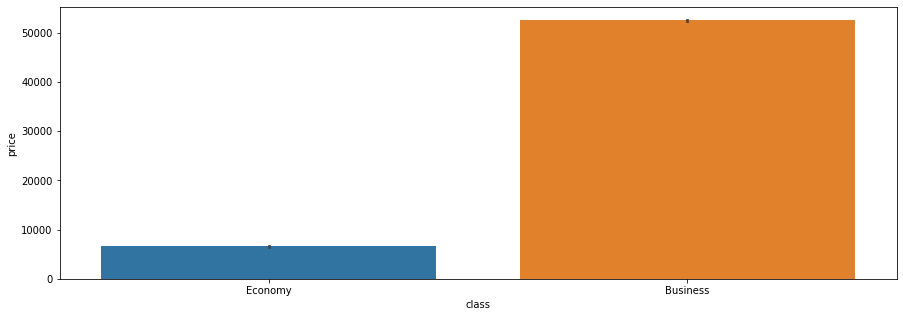

In [64]:
plt.figure(figsize = (15,5))
sns.barplot(data = df2, x = "class" , y = "price")

<AxesSubplot:xlabel='airline', ylabel='price'>

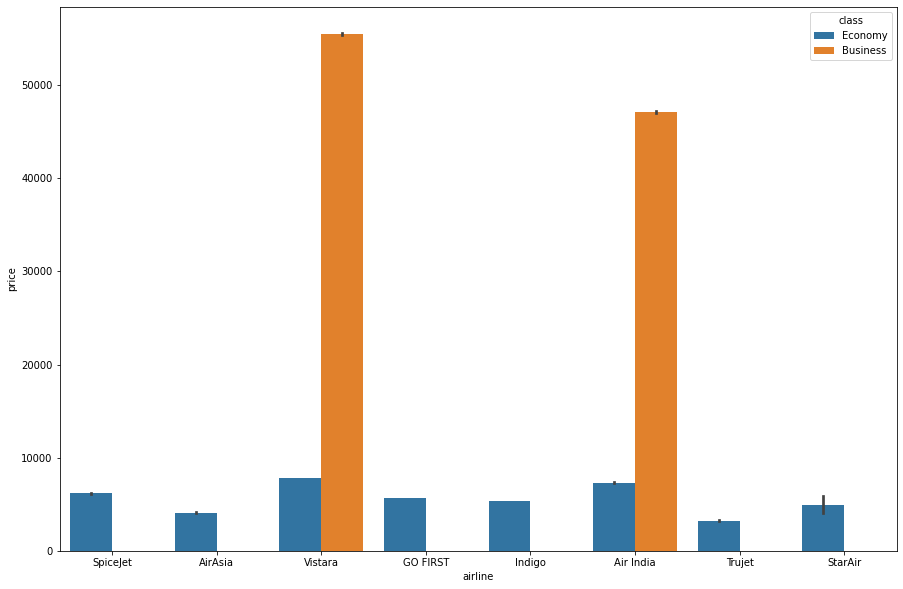

In [65]:
plt.figure(figsize = (15,10))
sns.barplot(data = df2, x = "airline" , y = "price" , hue = "class")

In [66]:
df2.columns

Index(['airline', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to',
       'price', 'class', 'days_left', 'flight_code'],
      dtype='object')

### Step- 4(Feature engineering)

In [67]:
df2.sample(5)

,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left,flight_code
85235,Indigo,afternoon,Bangalore,5.17,1,evening,Delhi,10061,Economy,8,7223-6E
237094,Vistara,afternoon,Mumbai,18.92,1,morning,Kolkata,63725,Business,37,944-UK
299973,Vistara,morning,Chennai,12.17,1,night,Hyderabad,51457,Business,43,836-UK
134828,Indigo,early morning,Kolkata,8.58,1,afternoon,Mumbai,3381,Economy,45,7114-6E
56092,Air India,afternoon,Mumbai,17.33,1,morning,Bangalore,6082,Economy,20,442-AI


### we have to do encoding for columns because model understand only numerical data

In [68]:
# we replace the value of columns 
df2.replace({"Economy":0,"Business":1},inplace = True)# replace the value of calss column economy class 0 and business 1
df2["dep_time"].replace({"morning":0,"evening":1,"early morning":2,"night":3,"afternoon":4,"late night":5},inplace = True)
df2["arr_time"].replace({"morning":0,"evening":1,"early morning":2,"night":3,"afternoon":4,"late night":5},inplace = True)

In [69]:
df2.sample(5)

,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left,flight_code
108042,Vistara,0,Bangalore,8.33,1,1,Kolkata,8322,0,38,812-UK
14541,Air India,0,Delhi,9.50,1,1,Bangalore,4230,0,24,678-AI
110249,Indigo,0,Bangalore,7.75,1,1,Hyderabad,5488,0,7,541-6E
219943,Vistara,0,Delhi,2.17,0,4,Hyderabad,24056,1,15,859-UK
258037,Vistara,0,Bangalore,26.75,1,4,Hyderabad,37985,1,33,852-UK


In [70]:
# one hot encoding 
for column in ["airline","from"]:
    enc = OneHotEncoder()
    df2[list(df2[column].unique())] = enc.fit_transform(df2[[column]]).toarray()

In [77]:
# get dummies for categorical data
df2[["to_Bangalore","to_Chennai","to_Delhi","to_Hyderabad","to_Kolkata","to_Mumbai"]]  = pd.get_dummies(df2["to"],prefix="to",prefix_sep='_')

In [78]:
df2.columns

Index(['airline', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to',
       'price', 'class', 'days_left', 'flight_code', 'SpiceJet', 'AirAsia',
       'Vistara', 'GO FIRST', 'Indigo', 'Air India', 'Trujet', 'StarAir',
       'Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai',
       'to_Bangalore', 'to_Chennai', 'to_Delhi', 'to_Hyderabad', 'to_Kolkata',
       'to_Mumbai'],
      dtype='object')

In [79]:
df2.sample(5)

,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,days_left,...,Bangalore,Kolkata,Hyderabad,Chennai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
135247,Vistara,0,Kolkata,13.58,1,3,Mumbai,6067,0,47,...,0.0,0.0,1.0,0.0,0,0,0,0,0,1
20356,Indigo,3,Delhi,2.08,0,5,Kolkata,5955,0,3,...,1.0,0.0,0.0,0.0,0,0,0,0,1,0
39136,Indigo,4,Delhi,8.25,1,3,Chennai,5918,0,26,...,1.0,0.0,0.0,0.0,0,1,0,0,0,0
195615,GO FIRST,0,Chennai,8.17,1,1,Bangalore,9999,0,23,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
57689,Vistara,2,Mumbai,8.50,1,1,Bangalore,12907,0,28,...,0.0,0.0,0.0,1.0,1,0,0,0,0,0


In [80]:
df2.drop(["flight_code","airline","from","to"],axis = 1,inplace = True) # delete columns 

In [81]:
df2.sample()

,dep_time,time_taken,stop,arr_time,price,class,days_left,SpiceJet,AirAsia,Vistara,...,Bangalore,Kolkata,Hyderabad,Chennai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
140479,1,2.58,0,1,3860,0,36,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1,0,0,0,0,0


## step-5(Feature selection)

## step-6(Model selection )

In [82]:
x = df2.drop("price",axis = 1)
y = df2["price"]

### split the model 

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x , y ,test_size=0.2 , random_state=45)

In [84]:
# if we want to use use knn algorithm so we have to do scaling 
scal = StandardScaler()
arr = scal.fit_transform(x_train)
x_train1 = pd.DataFrame(arr, columns = x_train.columns)

In [85]:
x_test1 = scal.transform(x_test)

### Step-7(model training)

In [86]:
def get_accuracy(model_name):
    model         = model_name
    model.fit(x_train1,y_train)
    y_pred_train  = model.predict(x_train1)
    mse_train     = mean_squared_error(y_train,y_pred_train)
    mae_train     = mean_absolute_error(y_train,y_pred_train)
    r2score_train = r2_score(y_train,y_pred_train)
    
    y_pred_test   = model.predict(x_test1)
    mse_test      = mean_squared_error(y_test,y_pred_test)
    mae_test      = mean_absolute_error(y_test,y_pred_test)
    r2score_test = r2_score(y_test,y_pred_test)
    
    return print(f"mse_train {mse_train} \nmae_train {mae_train} \nr2score_train {r2score_train} \nmse_test {mse_test} \nmae_test {mae_test} \nr2score_test {r2score_test}")

In [87]:
for model_name,model in [("LinearRegression",LinearRegression()),("DecisionTreeRegressor",DecisionTreeRegressor()),("RandomForestRegressor",DecisionTreeRegressor()),("XGBRegressor",XGBRegressor())]:
    print(model_name)
    print(get_accuracy(model))
    print("*"*100)

LinearRegression
mse_train 46635481.84183037 
mae_train 4527.341082464732 
r2score_train 0.9094242605917209 
mse_test 46563864.32216772 
mae_test 4520.704001659236 
r2score_test 0.9097599287374148
None
****************************************************************************************************
DecisionTreeRegressor
mse_train 370447.06732706656 
mae_train 57.450258387175566 
r2score_train 0.9992805152705706 
mse_test 12324775.229839105 
mae_test 1162.4327316426047 
r2score_test 0.9761147703003992
None
****************************************************************************************************
RandomForestRegressor
mse_train 370447.06732706656 
mae_train 57.450258387175566 
r2score_train 0.9992805152705706 
mse_test 12254899.782442639 
mae_test 1160.3473237529074 
r2score_test 0.9762501878703185
None
****************************************************************************************************
XGBRegressor
mse_train 11261566.818602398 
mae_train 1920.1269162307055 


### i m going with the random forest algorthm beacuse it gives best r2 score

### Step-8(Model evaluation)

In [90]:
random_model = RandomForestRegressor()
random_model.fit(x_train1,y_train)

RandomForestRegressor()

### Accuracy in trainig time 

In [91]:
y_pred_train  = random_model.predict(x_train1)
mse_train     = mean_squared_error(y_train,y_pred_train)
mae_train     = mean_absolute_error(y_train,y_pred_train)
r2score_train = r2_score(y_train,y_pred_train)
print(r2score_train)

0.9974453979014763


### Accuracy in testing time

In [92]:
y_pred_test  = random_model.predict(x_test1)
mse_test     = mean_squared_error(y_test,y_pred_test)
mae_test     = mean_absolute_error(y_test,y_pred_test)
r2score_test = r2_score(y_test,y_pred_test)
print(r2score_test)

0.9851791389277064


## Exporting the files for write apis

In [95]:
columns_name = {"columns":list(x_train.columns),"class":{"Economy":0,"Business":1},
               "dep_time":{"morning":0,"evening":1,"early morning":2,"night":3,"afternoon":4,"late night":5},
               "arr_time":{"morning":0,"evening":1,"early morning":2,"night":3,"afternoon":4,"late night":5}}

In [93]:
# random forest algorithm file
with open ("model.pkl","wb") as f:
    pickle.dump(random_model,f)

In [94]:
# standart scaling file
with open ("scaling.pkl","wb") as f:
    pickle.dump(scal,f)

In [96]:
with open ("column.json","w") as f:
    json.dump(columns_name,f)